# Step 1

## Team Member A (Atakan Devrent)

**1)** The put-call parity applies to European options because these options can only be exercised at maturity. The put-call parity relationship for European options is derived based on the assumption that there are no arbitrage opportunities in the market and that the options are held to maturity.

**2)** The put-call parity formula for European options is:

$C + K e^{-rT} = P + S$

Solving for the call price $C$:

$C = P + S - K e^{-rT}$


**3)** Solving for the put price $P$:

$P = C + K e^{-rT} - S$


**4)** Put-call parity does <u>not</u> apply in the same way to American options as it does to European options because <u>American options can be exercised at any time before or at maturity</u>. This early exercise feature introduces additional complexities and potential early exercise premiums that disrupt the straightforward relationship described by European put-call parity.

**5, 6, 7)**

$S_0 = 100$

$r = 0.05$

$\sigma = 0.2$

$T = 0.25$ *years*

In [9]:
import numpy as np

def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    P = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        P[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return P[0, 0], P, S, Delta

S_ini = 100  # price at t=0
r = 0.05  # risk-free rate
sigma = 0.2  # volatility
T = 0.25  # time to maturity in years
K = 100  # at the money strike price is equal to the underlying price at t=0
N = 20  # N is large to make sure we have good accuracy on the option price

european_call_price, C, S, Delta = call_option_delta(S_ini, K, T, r, sigma, N)
european_call_delta = Delta[0, 0]

european_put_price, C, S, Delta = put_option_delta(S_ini, K, T, r, sigma, N)
european_put_delta = Delta[0, 0]

print("European Call Option Price =", np.round(european_call_price, 2))
print("European Put Option Price =", np.round(european_put_price, ))

# Ensure put-call parity holds
is_parity_true = np.isclose(european_call_price + K * np.exp(-r*T), european_put_price + S_ini, atol=1e-6)
print("    Does the put-call parity hold?", is_parity_true)

European Call Option Price = 4.57
European Put Option Price = 3.0
    Does the put-call parity hold? True


My code calculates European call and put option prices using a binomial tree model by iterating from the terminal nodes (maturity) back to the root (current time), computing option prices at each node based on risk-neutral probabilities and adjusting for time value of money (risk-free rate). Finally it verifies put-call parity using *np.isclose()* method to handle numerical precision issues.

In [10]:
print("European Call Option Delta =", np.round(european_call_delta, 2))
print("European Put Option Delta =", np.round(european_put_delta, 2))

European Call Option Delta = 0.57
European Put Option Delta = -0.43


Call option has a positive delta value and the put option has a negative delta value, as expected. That is because delta measures the sensitivity of the option price with respect to the change in the price of the underlying:

$\Delta_C = \frac{\partial C}{\partial S}$

$\Delta_P = \frac{\partial C}{\partial P}$

Payoff of the call option **increases** when the price of the underlying asset increases, thus it has a **positive** delta value.

Payoff of the put option **decreases** when the price of the underlying asset increases, thus it has a **negative** delta value.

In [11]:
# If we increase volatility to 0.25
new_european_call_price, C, S, Delta = call_option_delta(S_ini, K, T, r, 0.25, N)  # sigma is changed to 0.25
new_european_call_delta = Delta[0, 0]

new_european_put_price, C, S, Delta = put_option_delta(S_ini, K, T, r, 0.25, N)  # sigma is changed to 0.25
new_european_put_delta = Delta[0, 0]

call_price_change = new_european_call_price - european_call_price
put_price_change = new_european_put_price - european_put_price

print("Call price change =", np.round(call_price_change, 2))
print("Put price change =", np.round(put_price_change, 2))

Call price change = 0.97
Put price change = 0.97


An **increase** in the underlying's volatility led to **higher** option prices, as expected. That's because increasing underlying volatility results in possible terminal (maturity) underlying prices being more spread out from the starting price, leading to possible extreme values. And because option payoffs are non-linear (the call option payoff is $max(0, S_T - K)$ and the put option payoff is $max(0, K - S_T)$), this leads to possible option payoffs being greater. This in turn results in option premiums (prices) being higher at $t=0$.

All results neatly organized in a table:

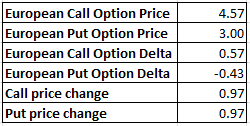

# Step 2

**15)**

$S_0 = 100$

$r = 0.05$

$\sigma = 0.2$

$T = 0.25$ *years*

Same parameters apply except the strike price $K$ where we select those values as

$70, 90, 100, 110, 130$ for Deep OTM, OTM, ATM, ITM, and Deep ITM calls.

In [12]:
import numpy as np

def american_option_trinomial(S0, K, T, r, sigma, N, option_type='call'):
    # Calculate parameters
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1

    pu = ((np.exp((r - 0.5 * sigma**2) * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / 
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp((r - 0.5 * sigma**2) * dt / 2)) / 
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    asset_prices = np.zeros((2 * N + 1, N + 1))
    asset_prices[N, 0] = S0

    for i in range(1, N + 1):
        for j in range(N - i, N + i + 1, 2):
            asset_prices[j, i] = S0 * (u ** ((j - N + i) // 2)) * (d ** ((N + i - j) // 2))

    # Initialize option values at maturity
    option_values = np.zeros((2 * N + 1, N + 1))

    if option_type == 'call':
        option_values[:, N] = np.maximum(0, asset_prices[:, N] - K)
    elif option_type == 'put':
        option_values[:, N] = np.maximum(0, K - asset_prices[:, N])

    # Backward induction for the possibility of early exercise
    for i in range(N - 1, -1, -1):
        for j in range(N - i, N + i + 1, 2):
            hold_value = (pu * option_values[j - 1, i + 1] +
                          pm * option_values[j, i + 1] +
                          pd * option_values[j + 1, i + 1]) * discount
            if option_type == 'call':
                exercise_value = max(0, asset_prices[j, i] - K)
            elif option_type == 'put':
                exercise_value = max(0, K - asset_prices[j, i])
            option_values[j, i] = max(hold_value, exercise_value)

    return option_values[N, 0]

# Example usage
S0 = 100  # Initial stock price
K_arr = [60, 90, 100, 110, 140]   # Different strike prices for Deep OTM, OTM, ATM, ITM, and Deep ITM
T = 1     # Time to maturity (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
N = 50    # Number of time steps

for K in K_arr:
    call_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='call')
    put_price = american_option_trinomial(S0, K, T, r, sigma, N, option_type='put')
    print(f"American Call Option Price for K = {K}: {np.round(call_price, 2)}")
    print(f"American Put Option Price for K = {K}: {np.round(put_price, 2)}")

American Call Option Price for K = 60: 40.0
American Put Option Price for K = 60: 0.0
American Call Option Price for K = 90: 10.0
American Put Option Price for K = 90: 0.03
American Call Option Price for K = 100: 1.08
American Put Option Price for K = 100: 1.06
American Call Option Price for K = 110: 0.05
American Put Option Price for K = 110: 10.0
American Call Option Price for K = 140: 0.0
American Put Option Price for K = 140: 40.0


Option prices neatly organized in a table:

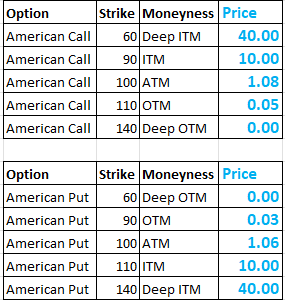

# Step 3

**25)**

